In [396]:
from getpass import getpass
api_key = getpass('Enter the Astra Token value: ')

Enter the Astra Token value:  ········


In [397]:
!pip install astrapy

In [398]:
import sys
sys.path.append("c:\\users\\admin\\anaconda3\\lib\\site-packages")
import astrapy
sys.executable


'C:\\Users\\Admin\\anaconda3\\python.exe'

In [399]:
!pip install cassandra-driver

In [400]:
import cassandra; print (cassandra.__version__)

3.29.1


In [402]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import json

# This secure connect bundle is autogenerated when you download your SCB, 
# if yours is different update the file name below
cloud_config= {
  'secure_connect_bundle': 'secure-connect-fairview-db.zip'
}

# This token JSON file is autogenerated when you download your token, 
# if yours is different update the file name below
with open("fairview-db-token.json") as f:
    secrets = json.load(f)

CLIENT_ID = secrets["clientId"]
CLIENT_SECRET = secrets["secret"]

auth_provider = PlainTextAuthProvider(CLIENT_ID, CLIENT_SECRET)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()


In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py

py.init_notebook_mode(connected=True)

row = session.execute("select * from fairview.wage_salaried_percentange_employment")


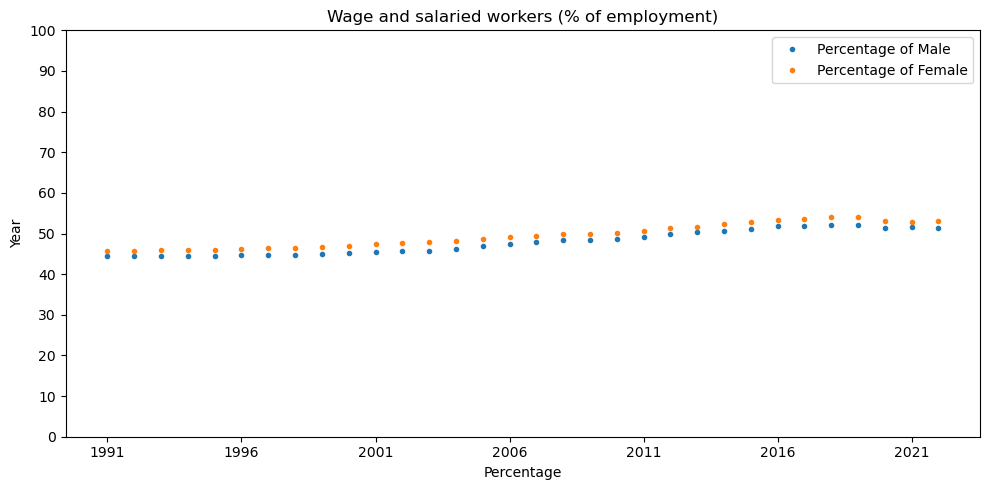

In [404]:

plt.xlabel('Percentage')
plt.ylabel('Year')
plt.title('Wage and salaried workers (% of employment)')
dimX = np.arange(df["year"].min(),df["year"].max(),5)
dimY = np.arange(0,110,10)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
plt.plot(df["year"], df["male"],'.',label='Percentage of Male') 
plt.plot(df["year"], df["female"],'.',label='Percentage of Female') 
plt.xticks(dimX)
plt.yticks(dimY)
plt.legend()
# function to show the plot 
plt.show()


In [225]:
gender_pay_gap_row = session.execute("select * from fairview.gender_pay_gap")
gender_pay_gap_df = pd.DataFrame(list(gender_pay_gap_row))
gender_pay_gap_df['totalpay'] = gender_pay_gap_df['basepay'] + gender_pay_gap_df['bonus'] 
gender_pay_gap_df.head(10)

,id,age,basepay,bonus,dept,education,gender,jobtitle,perfeval,seniority,totalpay
0,769,45,113283,5404,Sales,PhD,Female,IT,2,4,118687
1,23,24,85205,9792,Sales,PhD,Male,Warehouse Associate,5,3,94997
2,114,40,62040,8056,Administration,Masters,Female,Marketing Associate,5,3,70096
3,660,50,124470,5454,Engineering,Masters,Male,Sales Associate,2,5,129924
4,893,38,53839,3270,Engineering,PhD,Female,Marketing Associate,1,1,57109
5,53,35,97376,9564,Engineering,PhD,Female,Marketing Associate,5,5,106940
6,987,54,97311,3083,Sales,College,Male,Data Scientist,1,2,100394
7,878,58,141005,3384,Sales,High School,Female,Data Scientist,1,5,144389
8,110,29,89822,8818,Administration,Masters,Female,Marketing Associate,4,5,98640
9,91,26,68466,8384,Operations,PhD,Male,Software Engineer,5,2,76850


In [90]:
print("The gender pay gap or gender wage gap is the average difference between the remuneration for men and women who are working. Women are generally considered to be paid less than men. There are two distinct numbers regarding the pay gap: non-adjusted versus adjusted pay gap.");

The gender pay gap or gender wage gap is the average difference between the remuneration for men and women who are working. Women are generally considered to be paid less than men. There are two distinct numbers regarding the pay gap: non-adjusted versus adjusted pay gap.


In [226]:
title = pd.get_dummies(gender_pay_gap_df, columns=['gender']).groupby('jobtitle').sum()
female = gender_pay_gap_df[gender_pay_gap_df['gender'] == 'Female'].groupby('jobtitle').sum()
male = gender_pay_gap_df[gender_pay_gap_df['gender'] == 'Male'].groupby('jobtitle').sum()
female['basepay'] /= title['gender_Female'].tolist()
female['totalpay'] /= title['gender_Female'].tolist()
female['bonus'] /= title['gender_Female'].tolist()
male['basepay'] /= title['gender_Male'].tolist()
male['totalpay'] /= title['gender_Male'].tolist()
male['bonus'] /= title['gender_Male'].tolist()
female

,id,age,basepay,bonus,dept,education,gender,perfeval,seniority,totalpay
jobtitle,,,,,,,,,,
Data Scientist,25262,2279,95704.792453,6747.471698,SalesEngineeringManagementSalesAdministrationA...,High SchoolPhDMastersMastersMastersHigh School...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,161,161,102452.264151
Driver,21805,1933,86867.630435,6329.717391,ManagementAdministrationAdministrationSalesMan...,MastersMastersHigh SchoolCollegeCollegeMasters...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,134,123,93197.347826
Financial Analyst,25062,1996,95458.326531,6285.326531,SalesOperationsOperationsAdministrationOperati...,CollegeCollegeHigh SchoolHigh SchoolPhDHigh Sc...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,147,154,101743.653061
Graphic Designer,23429,1977,92243.291667,6567.125000,AdministrationSalesSalesOperationsEngineeringM...,CollegePhDCollegeHigh SchoolPhDCollegeMastersC...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,134,154,98810.416667
IT,26818,2145,90475.720000,6362.220000,SalesManagementOperationsSalesAdministrationAd...,PhDCollegeCollegeHigh SchoolMastersHigh School...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,154,142,96837.940000
Manager,10717,803,127252.277778,5992.000000,ManagementManagementEngineeringManagementSales...,PhDHigh SchoolHigh SchoolHigh SchoolMastersMas...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,43,54,133244.277778
Marketing Associate,59224,4507,76119.177570,6131.971963,AdministrationEngineeringEngineeringAdministra...,MastersPhDPhDMastersHigh SchoolCollegeHigh Sch...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,310,321,82251.149533
Sales Associate,22827,1814,91894.209302,6326.325581,EngineeringManagementOperationsSalesAdministra...,MastersPhDHigh SchoolHigh SchoolHigh SchoolCol...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...,115,131,98220.534884
Software Engineer,3611,296,94701.000000,6446.375000,EngineeringOperationsSalesEngineeringManagemen...,CollegeMastersPhDHigh SchoolPhDHigh SchoolColl...,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFemale,22,19,101147.375000


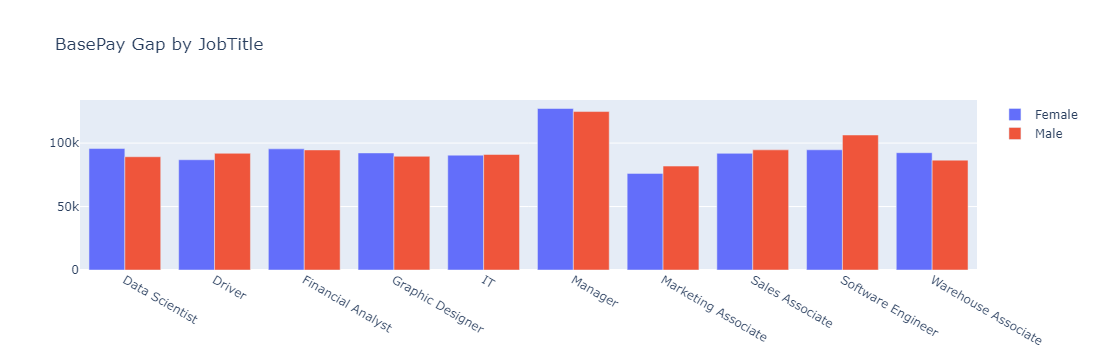

In [227]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=female.index, y=female['basepay']),
    go.Bar(name='Male', x=male.index, y=male['basepay'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='BasePay Gap by JobTitle')
fig.show()

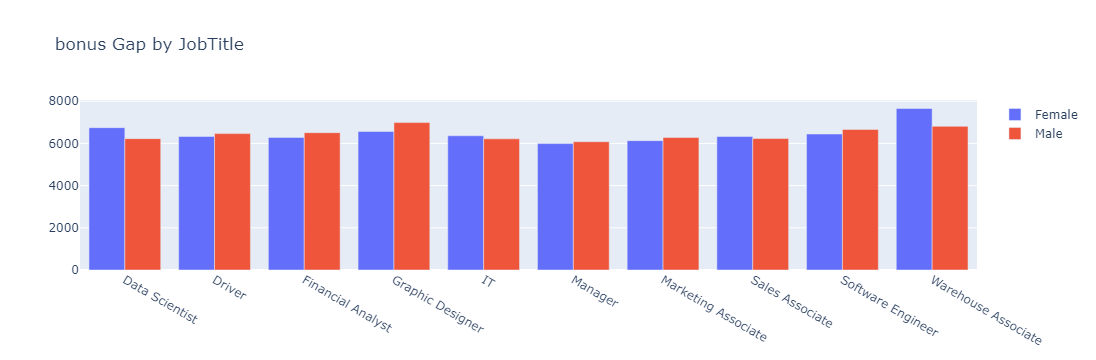

In [107]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=female.index, y=female['bonus']),
    go.Bar(name='Male', x=male.index, y=male['bonus'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='bonus Gap by JobTitle')
fig.show()

In [346]:
%%HTML
<font size="6">  
    Women earn just 77 cents for every $1 paid to men. 
</font> 

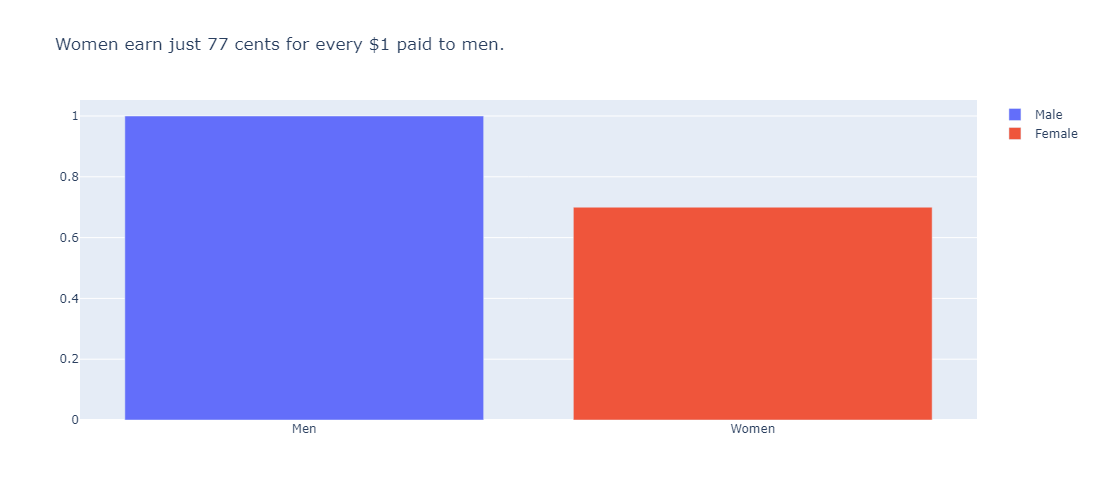

In [387]:
fig = go.Figure(data=[
    go.Bar(name='Male', x=["Men"], y=[1]),
    go.Bar(name='Female', x=["Women"], y=[0.7])
])
# Change the bar mode
fig.update_layout(barmode='group',height=500,width=400, title='Women earn just 77 cents for every $1 paid to men.')
fig.show()

In [363]:
%%HTML
<font size="4">  
    <p>Women, Business and the Law measures the enabling environment for women's economic opportunity in 190 economies. </p>
    This year, the study presents two sets of data: Women, Business and the Law 1.0 (WBL 1.0) and an expanded version, Women, Business and the Law 2.0 (WBL 2.0).
    
    <p><b>Indicators</b></p>
    <ul>
        <li>Mobility</li>
        <li>Workplace</li>
        <li>Pay</li>
        <li>Marriage</li>
        <li>Parenthood</li>
        <li>Entrepreneurship</li>
        <li>Assets</li>
        <li>Pension</li>
    </ul>
</font> 


In [232]:
gender_pay_gap_row = session.execute("select * from fairview.wbl_gender_pay_indicator")
gender_pay_gap_df = pd.DataFrame(list(gender_pay_gap_row))


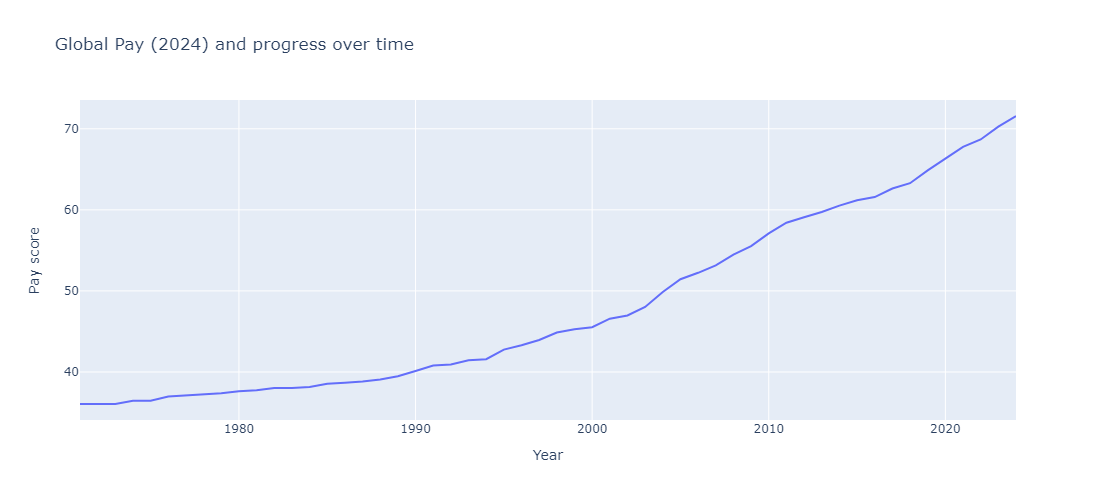

In [289]:
gender_pay_gap_df_world = gender_pay_gap_df
gender_pay_gap_df_world = gender_pay_gap_df_world.groupby(['report_year']).agg({'pay_score': ['mean', 'min', 'max']})
gender_pay_gap_df_world = gender_pay_gap_df_world.reset_index()

gender_pay_gap_df_world
fig = go.Figure(data=[
    go.Scatter(name='Global', x=gender_pay_gap_df_world['report_year'], y=gender_pay_gap_df_world['pay_score']['mean'], mode='lines')
])

fig.update_layout(
    title=" Global Pay (2024) and progress over time ", xaxis_title="Year", yaxis_title="Pay score", legend_title="Global",
    autosize=True,
    width=1000,
    height=500,
    yaxis = dict(
        zeroline=True,
        tickvals=[i for i in [10,20,30,40,50,60,70,80,90,100]],
        tickformat=""
    ),
     xaxis = dict(
        zeroline=True,
        tickmode = 'linear',
        tick0 = 0,
        dtick = 10
    ),
)
fig.show()

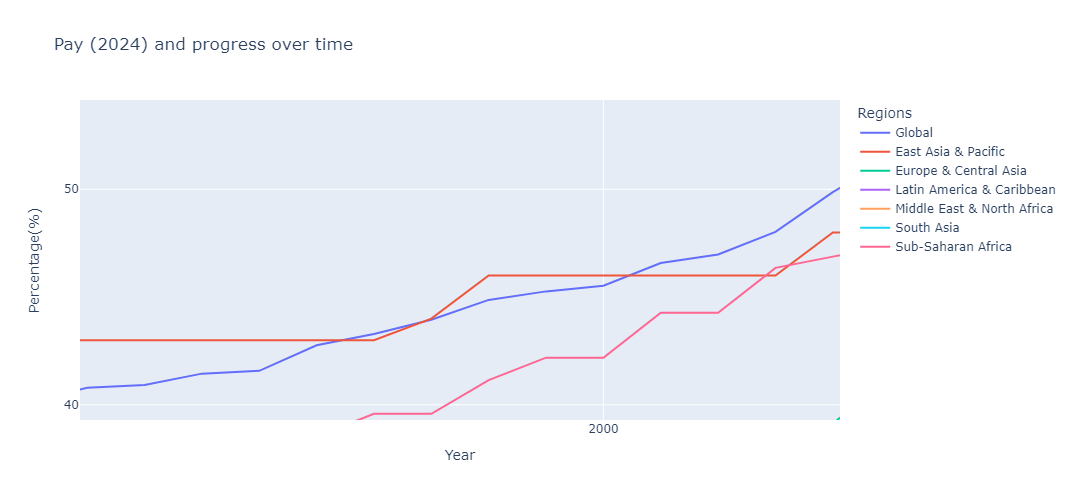

In [287]:

gender_pay_gap_df_groupby = gender_pay_gap_df.groupby(['region','report_year']).agg({'pay_score': ['mean', 'min', 'max']})
gender_pay_gap_df_groupby = gender_pay_gap_df_groupby.reset_index()

gender_pay_gap_df_groupby.columns

gender_pay_gap_df_groupby_east_asia = gender_pay_gap_df_groupby[gender_pay_gap_df_groupby['region']=='East Asia & Pacific']
gender_pay_gap_df_groupby_europe = gender_pay_gap_df_groupby[gender_pay_gap_df_groupby['region']=='Europe & Central Asia']
gender_pay_gap_df_groupby_latin_america = gender_pay_gap_df_groupby[gender_pay_gap_df_groupby['region']=='Latin America & Caribbean']
gender_pay_gap_df_groupby_middle_east = gender_pay_gap_df_groupby[gender_pay_gap_df_groupby['region']=='Middle East & North Africa']
gender_pay_gap_df_groupby_south_asia = gender_pay_gap_df_groupby[gender_pay_gap_df_groupby['region']=='South Asia']
gender_pay_gap_df_groupby_saharan_africa = gender_pay_gap_df_groupby[gender_pay_gap_df_groupby['region']=='Sub-Saharan Africa'] 

fig = go.Figure(data=[
    go.Scatter(name='Global', x=gender_pay_gap_df_world['report_year'], y=gender_pay_gap_df_world['pay_score']['mean'], mode='lines'),
    go.Scatter(name='East Asia & Pacific', x=gender_pay_gap_df_groupby_east_asia['report_year'], y=gender_pay_gap_df_groupby_east_asia['pay_score']['mean'], mode='lines'),
    go.Scatter(name='Europe & Central Asia', x=gender_pay_gap_df_groupby_europe['report_year'], y=gender_pay_gap_df_groupby_europe['pay_score']['mean'], mode='lines'),
    go.Scatter(name='Latin America & Caribbean', x=gender_pay_gap_df_groupby_latin_america['report_year'], y=gender_pay_gap_df_groupby_latin_america['pay_score']['mean'], mode='lines'),
    go.Scatter(name='Middle East & North Africa', x=gender_pay_gap_df_groupby_middle_east['report_year'], y=gender_pay_gap_df_groupby_middle_east['pay_score']['mean'], mode='lines'),
    go.Scatter(name='South Asia', x=gender_pay_gap_df_groupby_south_asia['report_year'], y=gender_pay_gap_df_groupby_south_asia['pay_score']['mean'], mode='lines'),
    go.Scatter(name='Sub-Saharan Africa', x=gender_pay_gap_df_groupby_saharan_africa['report_year'], y=gender_pay_gap_df_groupby_saharan_africa['pay_score']['mean'], mode='lines')
])
fig.update_layout(
    title="Pay (2024) and progress over time ", xaxis_title="Year", yaxis_title="Pay score", legend_title="Regions",
    autosize=True,
    width=1000,
    height=500,
    yaxis = dict(
        zeroline=True,
        tickvals=[i for i in [10,20,30,40,50,60,70,80,90,100]],
        tickformat=""
    ),
     xaxis = dict(
        zeroline=True,
        tickmode = 'linear',
        tick0 = 0,
        dtick = 10
    ),
)

fig.show()

In [295]:
gender_pay_gap_df.columns

Index(['id', 'can_a_woman_work_at_night_in_the_same_way_as_a_man',
       'can_a_woman_work_in_a_job_deemed_dangerous_in_the_same_way_as_a_man',
       'can_a_woman_work_in_an_industrial_job_in_the_same_way_as_a_man',
       'does_the_law_mandate_equal_remuneration_for_work_of_equal_value',
       'economy', 'economy_code', 'income_group', 'iso_code',
       'law_legal_basis', 'law_score', 'pay_score', 'region', 'report_year',
       'work_dangerous_same_way_legal_basis', 'work_dangerous_same_way_score',
       'work_inductrial_same_way_legal_basis',
       'work_inductrial_same_way_score', 'work_night_same_way_legal_basis',
       'work_night_same_way_score'],
      dtype='object')

In [336]:
gender_pay_gap_df_groupby_current_year = gender_pay_gap_df[(gender_pay_gap_df['report_year']==2024)]
gender_pay_gap_df_groupby_economy_work_equal_value = gender_pay_gap_df_groupby_current_year.groupby(['does_the_law_mandate_equal_remuneration_for_work_of_equal_value']).agg({'economy': ['count']})
gender_pay_gap_df_groupby_economy_work_equal_value = gender_pay_gap_df_groupby_economy_work_equal_value.reset_index()
gender_pay_gap_df_groupby_economy_work_equal_value


,does_the_law_mandate_equal_remuneration_for_work_of_equal_value,economy
,,count
0,No,92
1,Yes,98


In [324]:
gender_pay_gap_df_groupby_economy_woman_work_at_night = gender_pay_gap_df_groupby_current_year.groupby(['can_a_woman_work_at_night_in_the_same_way_as_a_man']).agg({'economy': ['count']})
gender_pay_gap_df_groupby_economy_woman_work_at_night = gender_pay_gap_df_groupby_economy_woman_work_at_night.reset_index()
gender_pay_gap_df_groupby_economy_woman_work_at_night

,can_a_woman_work_at_night_in_the_same_way_as_a_man,economy
,,count
0,No,20
1,Yes,170


In [325]:
gender_pay_gap_df_groupby_economy_industrial_job = gender_pay_gap_df_groupby_current_year.groupby(['can_a_woman_work_in_an_industrial_job_in_the_same_way_as_a_man']).agg({'economy': ['count']})
gender_pay_gap_df_groupby_economy_industrial_job = gender_pay_gap_df_groupby_economy_industrial_job.reset_index()
gender_pay_gap_df_groupby_economy_industrial_job

,can_a_woman_work_in_an_industrial_job_in_the_same_way_as_a_man,economy
,,count
0,No,59
1,Yes,131


In [327]:
gender_pay_gap_df_groupby_economy_dangerous_job = gender_pay_gap_df_groupby_current_year.groupby(['can_a_woman_work_in_a_job_deemed_dangerous_in_the_same_way_as_a_man']).agg({'economy': ['count']})
gender_pay_gap_df_groupby_economy_dangerous_job = gender_pay_gap_df_groupby_economy_dangerous_job.reset_index()
gender_pay_gap_df_groupby_economy_dangerous_job

,can_a_woman_work_in_a_job_deemed_dangerous_in_the_same_way_as_a_man,economy
,,count
0,No,45
1,Yes,145


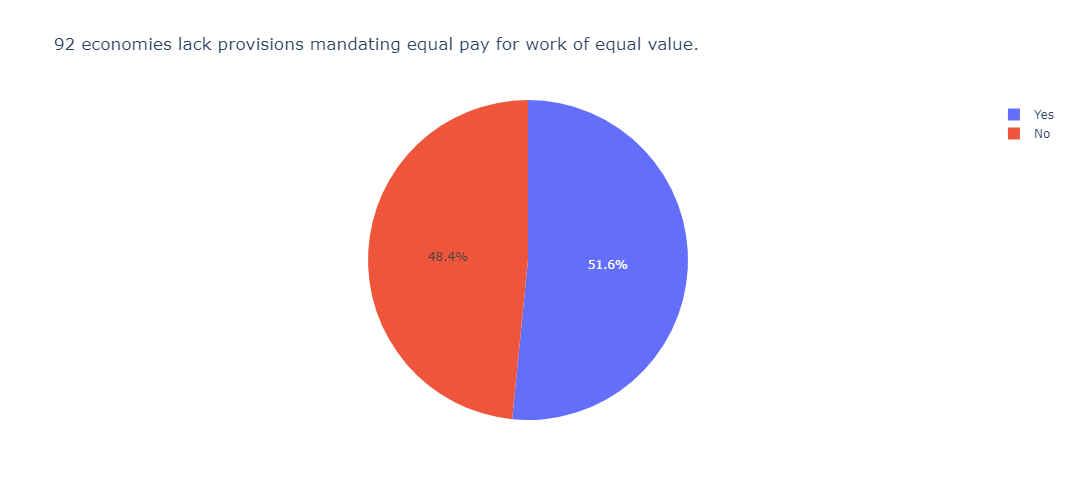

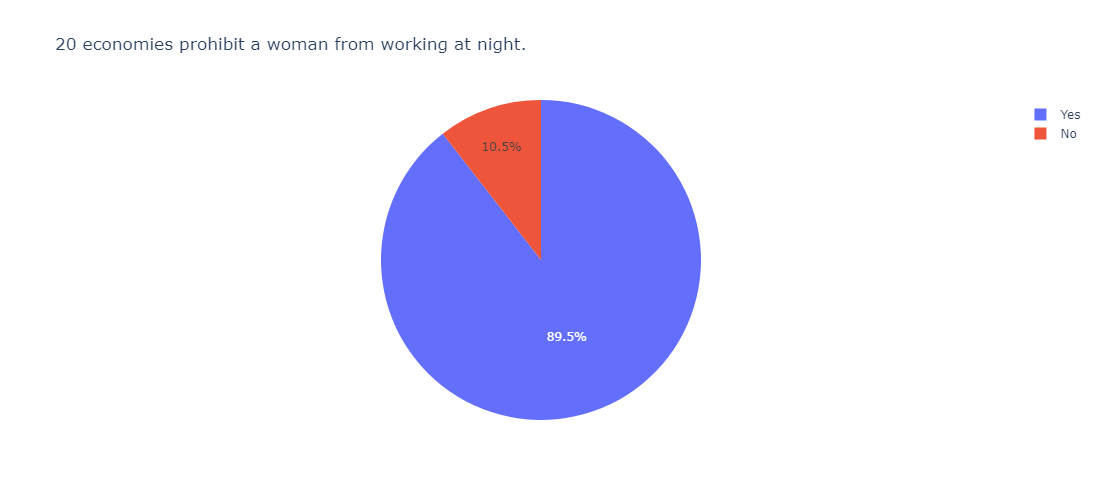

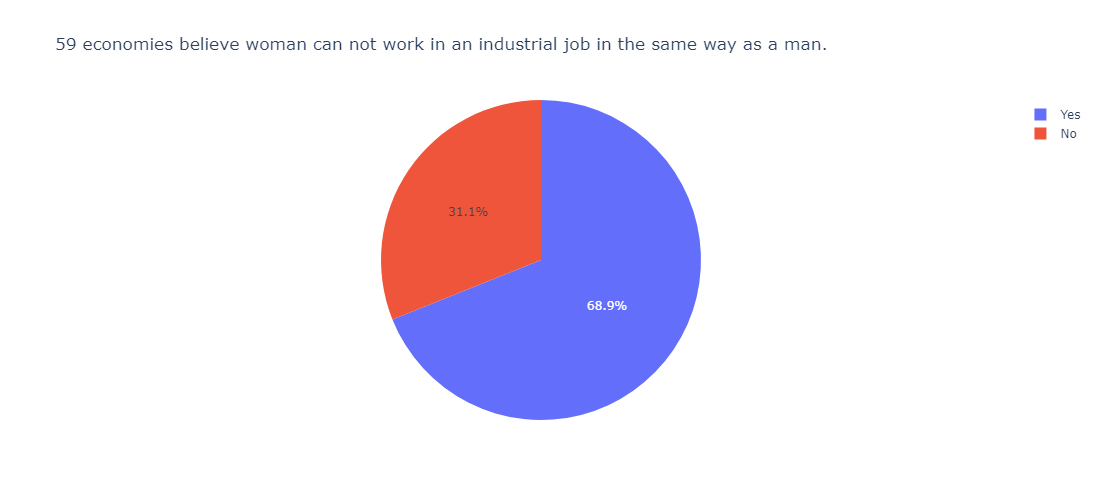

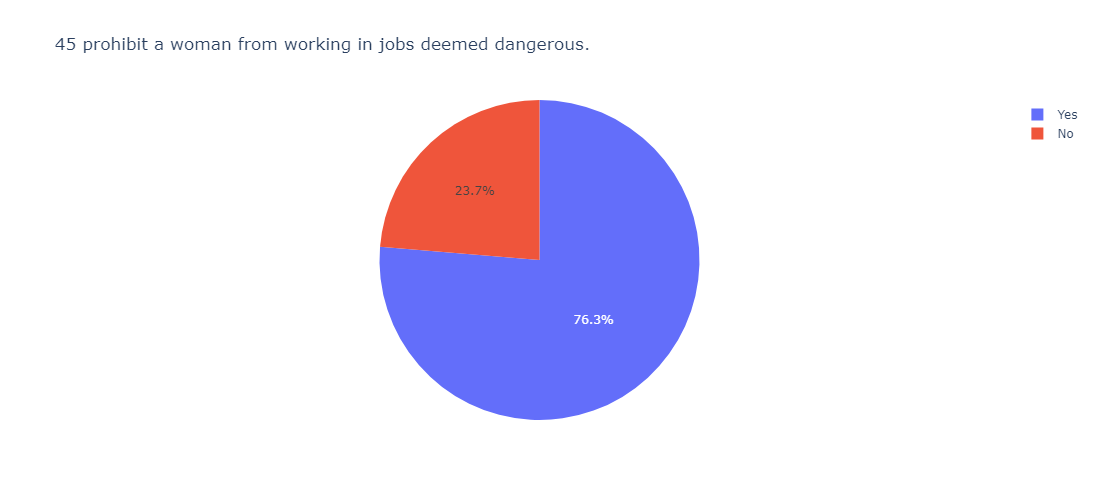

In [389]:
fig = go.Figure(data=[
    go.Pie(labels=gender_pay_gap_df_groupby_economy_work_equal_value['does_the_law_mandate_equal_remuneration_for_work_of_equal_value'] , values=gender_pay_gap_df_groupby_economy_work_equal_value['economy']['count']),
])
fig.update_layout(
    title="92 economies lack provisions mandating equal pay for work of equal value.", 
   height=500,width=400
)
fig.show()
fig = go.Figure(data=[
    go.Pie(labels=gender_pay_gap_df_groupby_economy_woman_work_at_night['can_a_woman_work_at_night_in_the_same_way_as_a_man'] , values=gender_pay_gap_df_groupby_economy_woman_work_at_night['economy']['count'])
])
fig.update_layout(
    title="20 economies prohibit a woman from working at night.", 
    height=500,width=400
)
fig.show()
fig = go.Figure(data=[
    go.Pie(labels=gender_pay_gap_df_groupby_economy_industrial_job['can_a_woman_work_in_an_industrial_job_in_the_same_way_as_a_man'] , values=gender_pay_gap_df_groupby_economy_industrial_job['economy']['count'])
])
fig.update_layout(
    title="59 economies believe woman can not work in an industrial job in the same way as a man.", 
   height=500,width=400
)
fig.show()
fig = go.Figure(data=[
    go.Pie(labels=gender_pay_gap_df_groupby_economy_dangerous_job['can_a_woman_work_in_a_job_deemed_dangerous_in_the_same_way_as_a_man'] , values=gender_pay_gap_df_groupby_economy_dangerous_job['economy']['count'])
])
fig.update_layout(
    title="45 prohibit a woman from working in jobs deemed dangerous.", 
    height=500,width=400
)
fig.show()

In [ ]:
gender_pay_gap_df_groupby = gender_pay_gap_df['gender_pay_gap_df'].groupby(['economy','report_year']).agg({'pay_score': ['mean', 'min', 'max']})
gender_pay_gap_df_groupby = gender_pay_gap_df_groupby.reset_index()